# 1.Set up environment

In [1]:
!pip install roboflow

In [2]:
!pip install ultralytics

In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt
from roboflow import Roboflow
from ultralytics import YOLO
import PIL
import os
HOME = os.getcwd()
print(HOME)

/content


#2.Train the model

In [4]:
#@title load data from Roboflow
rf = Roboflow(api_key="v09gYViLWgS5dstumF2S")
project = rf.workspace("quyendoai").project("waste-detection-h3jww")
version = project.version(4)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Waste-Detection-4 in yolov8:: 100%|██████████| 3752/3752 [00:03<00:00, 999.28it/s] 


***sau khi load data, mở file data.yaml trong thư mục data vừa được tải và cập nhật lại đường dẫn có các thư mục hình ảnh của tập test, train và valid***

In [5]:
#@title load model from ultralytics
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

100%|██████████| 6.23M/6.23M [00:00<00:00, 74.9MB/s]



## Train YOLOv8

In [9]:
results = model.train(data=dataset.location + '/data.yaml',epochs=75,imgsz=640 )

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/Waste-Detection-4/data.yaml, epochs=75, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplif

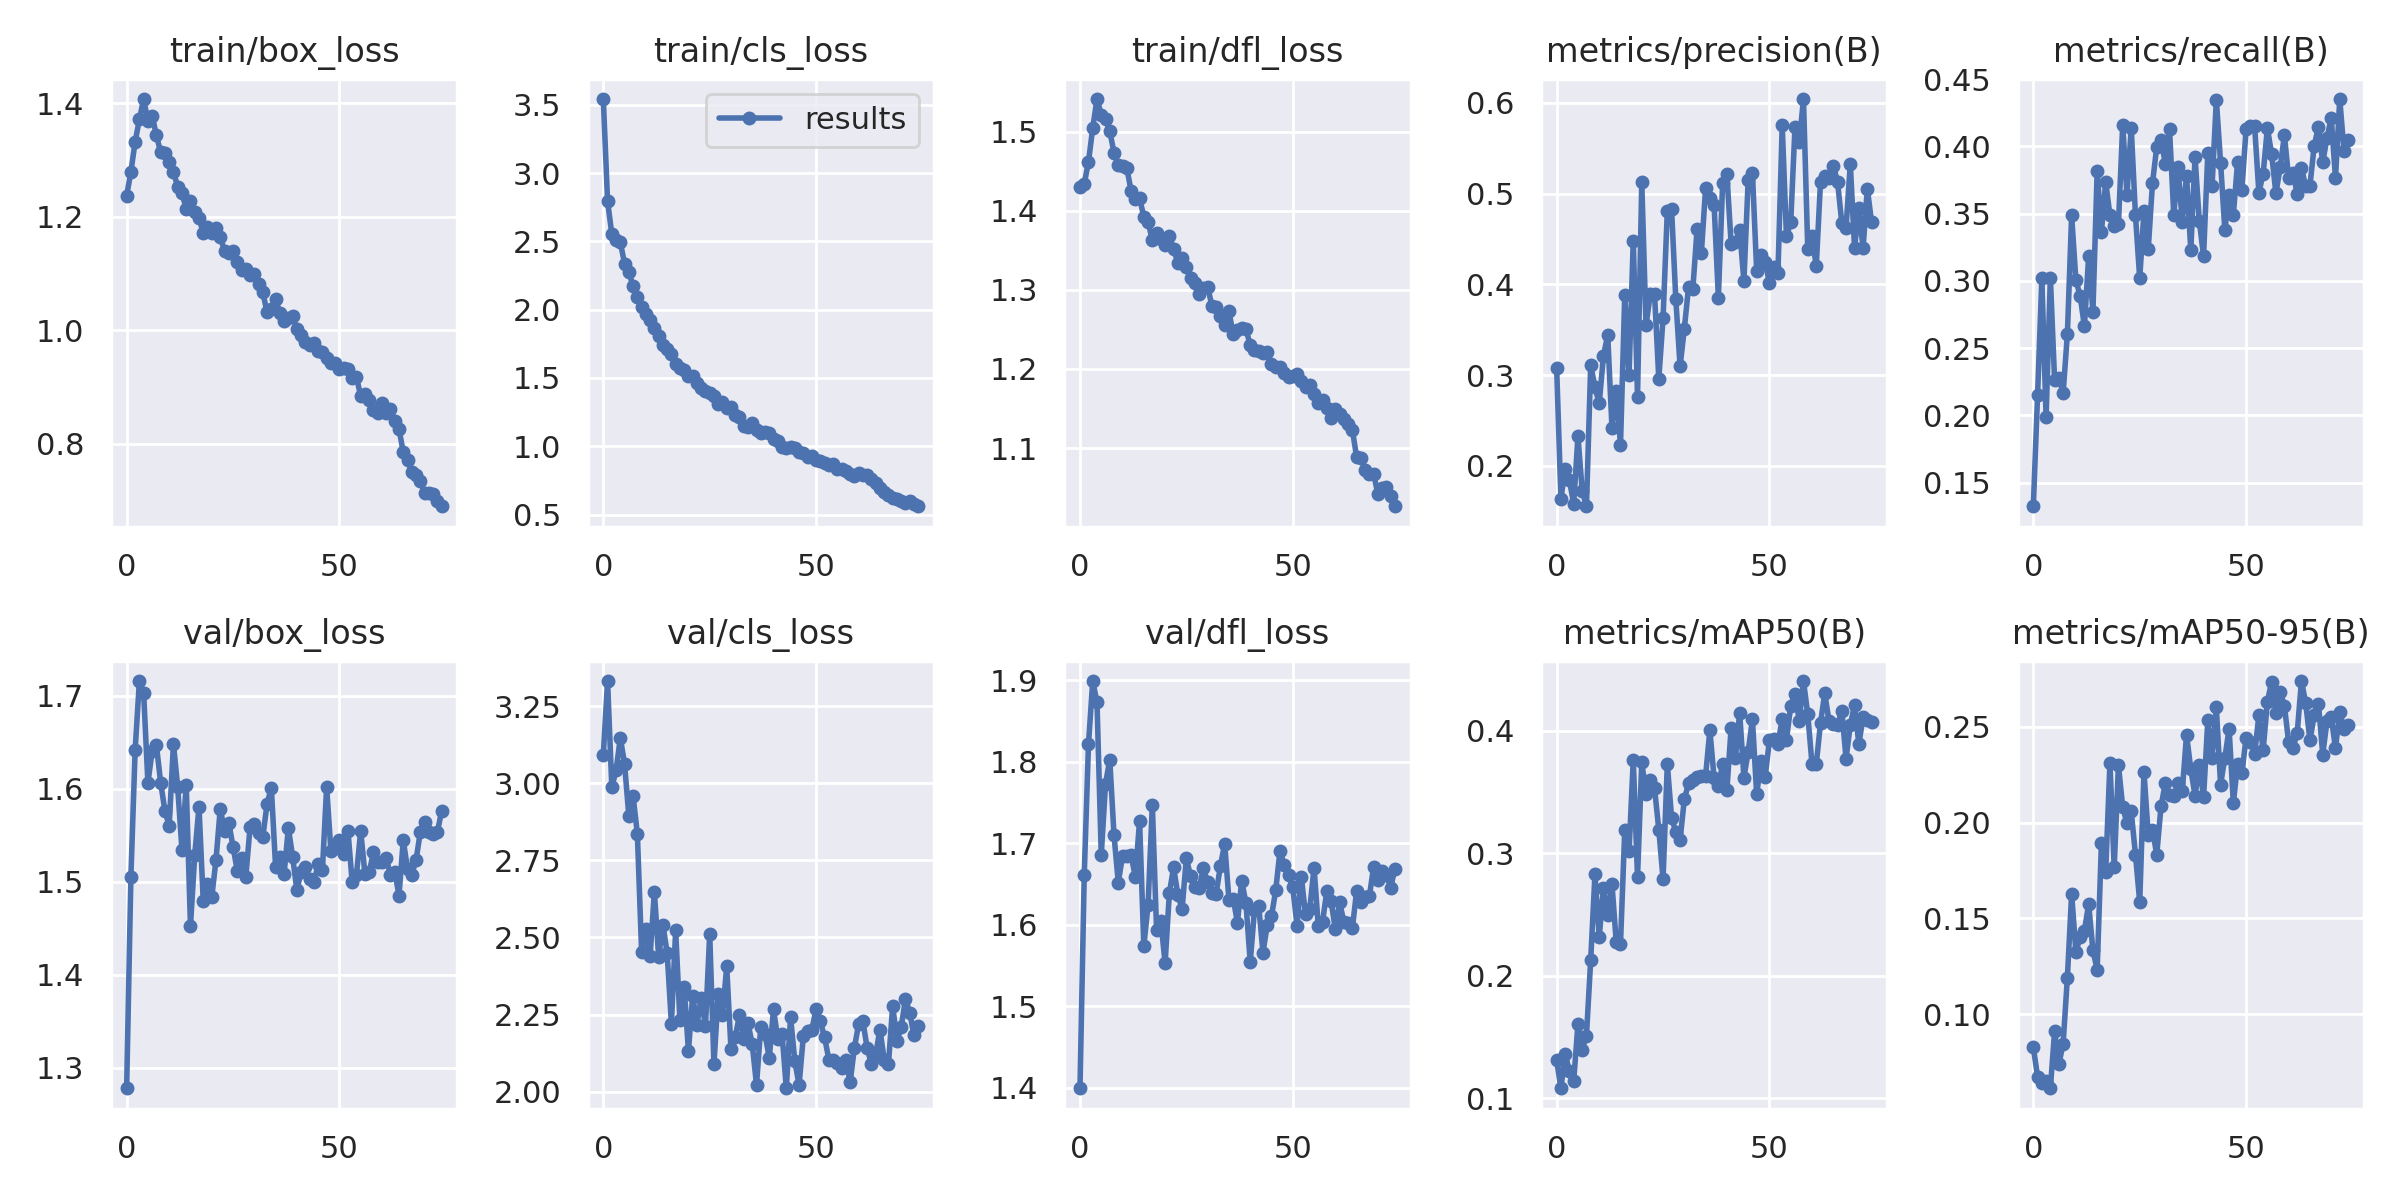

In [10]:
#@title training graph
train_result_img = PIL.Image.open('/content/runs/detect/train/results.png')
train_result_img

## Validate

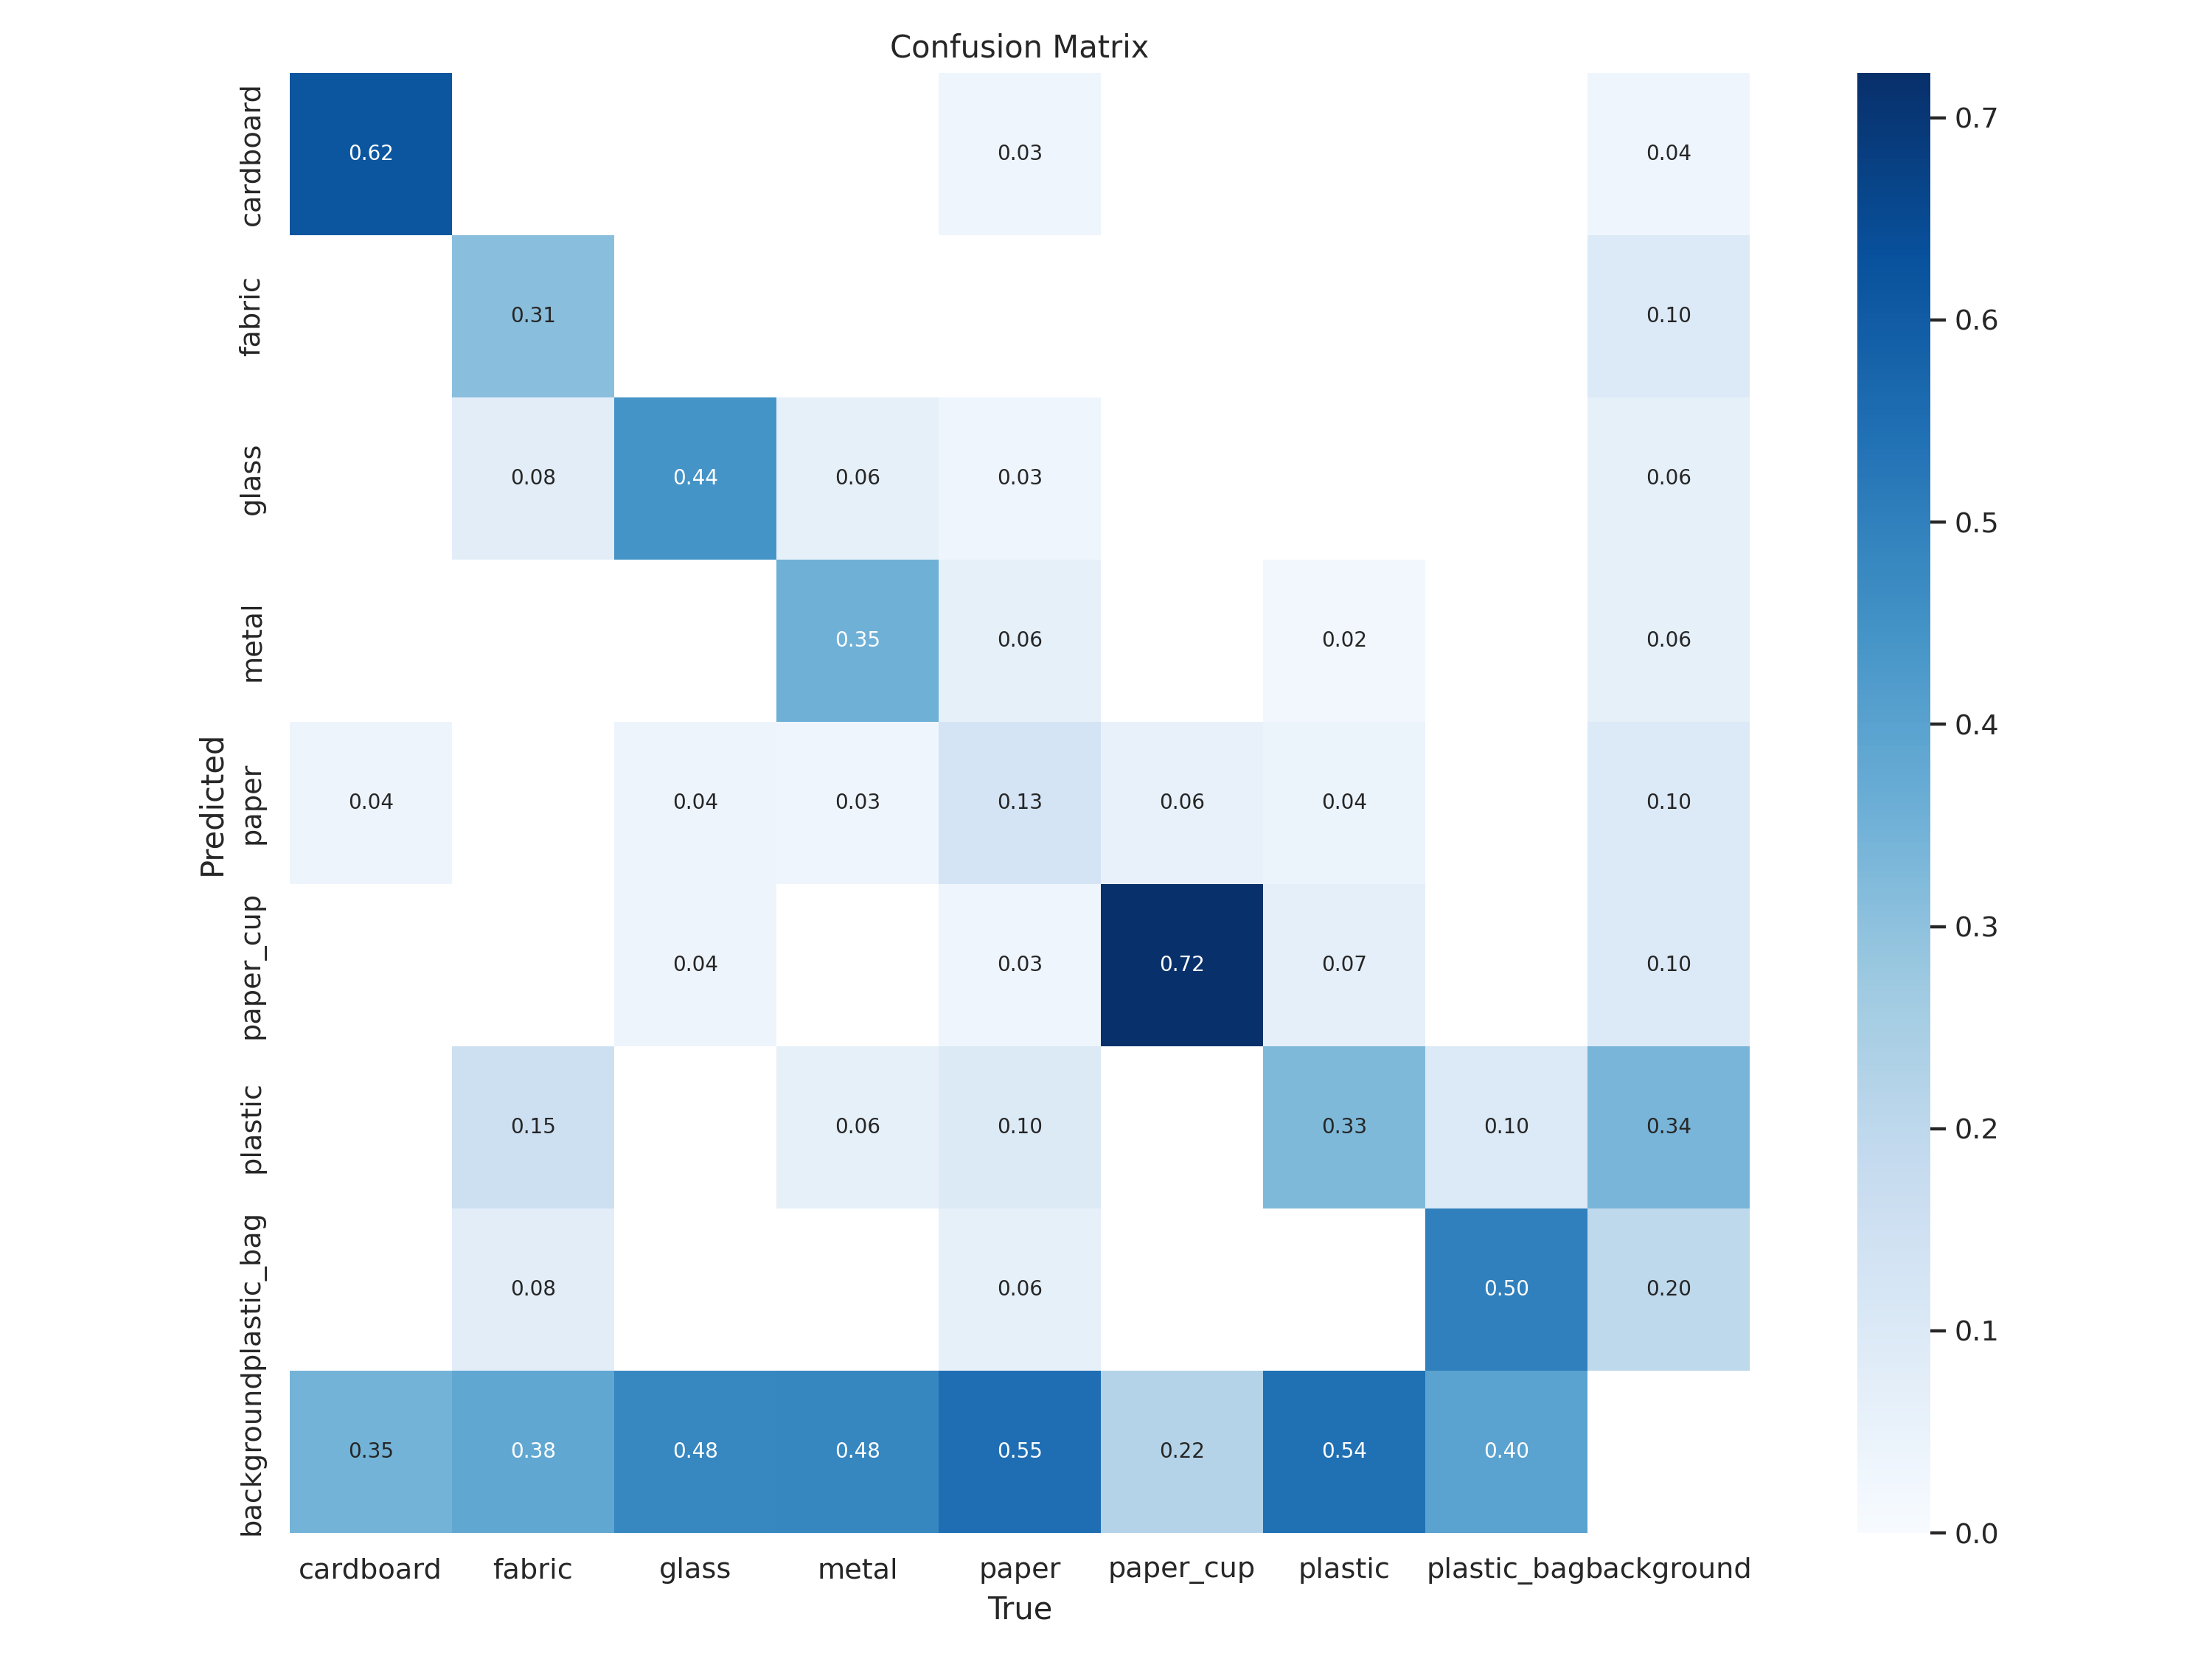

In [11]:
#@title confusion matrix
conf_matrix = PIL.Image.open('/content/runs/detect/train/confusion_matrix.png')
conf_matrix

## validation result

### ground truth

In [15]:
val_batch0_img_gt = PIL.Image.open('/content/runs/detect/train/val_batch0_labels.jpg')
val_batch0_img_gt

Output hidden; open in https://colab.research.google.com to view.

In [14]:
val_batch1_img_gt = PIL.Image.open('/content/runs/detect/train/val_batch1_labels.jpg')
val_batch1_img_gt

Output hidden; open in https://colab.research.google.com to view.

### predictions

In [16]:
val_batch0_img = PIL.Image.open('/content/runs/detect/train/val_batch0_pred.jpg')
val_batch0_img

Output hidden; open in https://colab.research.google.com to view.

In [12]:
val_batch1_img = PIL.Image.open('/content/runs/detect/train/val_batch1_pred.jpg')
val_batch1_img

Output hidden; open in https://colab.research.google.com to view.

## Test

***Để thực hiện đánh giá trên tập dữ liệu test, cần thay đổi đường dẫn trong file data.yaml, thay đường dẫn của tập test thành valid và ngược lại, sau đó sử dụng phương thức model.val()***

In [19]:
test_results = model.val(data='/content/Waste-Detection-4/data.yaml',
                               imgsz=640,
                               batch=16,
                               conf=0.25,
                               iou=0.6,
                               device='0')

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/Waste-Detection-4/test/labels... 34 images, 0 backgrounds, 0 corrupt: 100%|██████████| 34/34 [00:00<00:00, 1279.50it/s]
val: New cache created: /content/Waste-Detection-4/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.07it/s]
                   all   

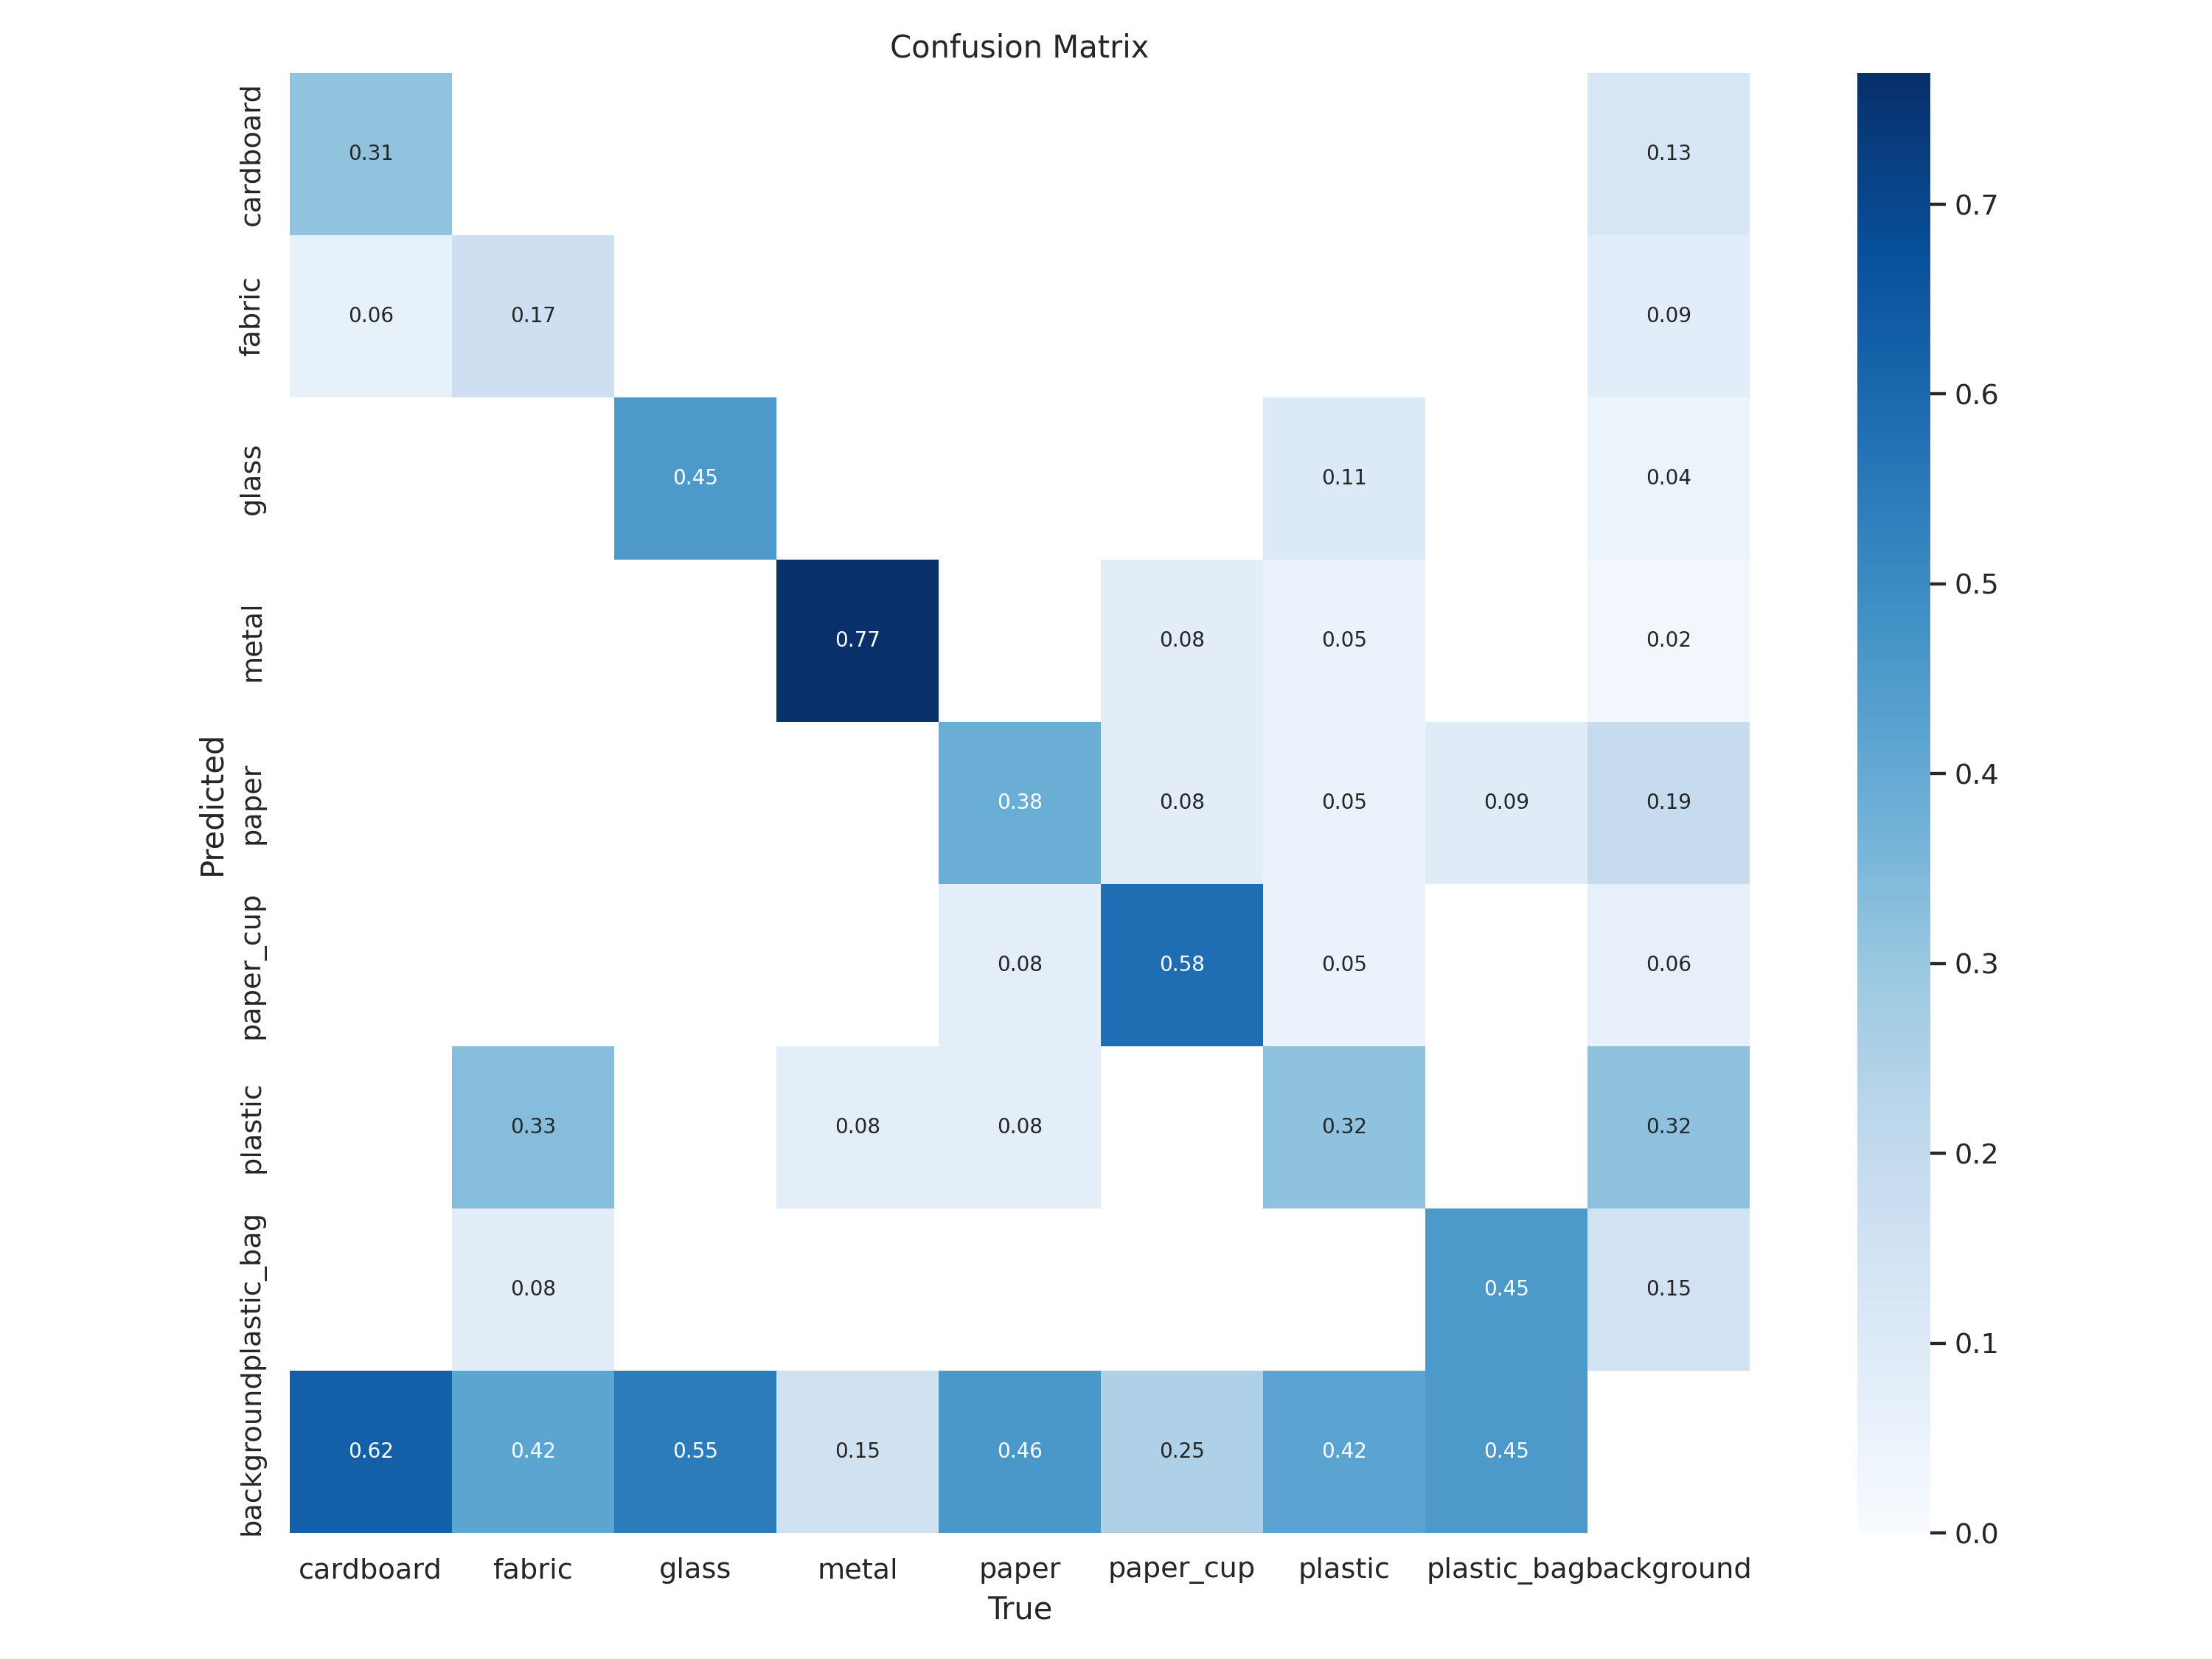

In [26]:
#@title test confusion matrix
test_conf_matrix = PIL.Image.open('/content/runs/detect/val2/confusion_matrix.png')
test_conf_matrix

### ground truth

In [24]:
test_batch0_img_gt = PIL.Image.open('/content/runs/detect/val2/val_batch0_labels.jpg')
test_batch0_img_gt

Output hidden; open in https://colab.research.google.com to view.

### predictions

In [25]:
test_batch0_img = PIL.Image.open('/content/runs/detect/val2/val_batch0_pred.jpg')
test_batch0_img

Output hidden; open in https://colab.research.google.com to view.

# 3.Upload model to Roboflow

In [ ]:
project.version(dataset.version).deploy(model_type='yolov8', model_path='/content/runs/detect/train')

Dependency ultralytics==8.0.196 is required but found version=8.2.18, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
View the status of your deployment at: https://app.roboflow.com/quyendoai/waste-detection-h3jww/4
Share your model with the world at: https://universe.roboflow.com/quyendoai/waste-detection-h3jww/model/4
